In [1]:
%run waterfilling-2.ipynb

In [2]:
without_csit_1tx_1rx = np.zeros(len(eb_no_db))
without_csit_1tx_2rx = np.zeros(len(eb_no_db))
without_csit_2tx_1rx = np.zeros(len(eb_no_db))
without_csit_2tx_2rx = np.zeros(len(eb_no_db))
without_csit_4tx_4rx = np.zeros(len(eb_no_db))
csit_1tx_1rx = np.zeros(len(eb_no_db))
csit_2tx_1rx = np.zeros(len(eb_no_db))
csit_2rx_1tx = np.zeros(len(eb_no_db)) 
csit_2tx_2rx = np.zeros(len(eb_no_db)) 

In [3]:
def capacity_each_channel(Es, nTx, noise_variance, S):
    
    capacity_each_channel = 0
    
    for kk in range(len(S)):
        
        c = np.log2(1 + (Es / (nTx * noise_variance)) * np.square(S[kk]))
        
        capacity_each_channel = capacity_each_channel + c
        
    return capacity_each_channel

In [4]:
def capacity_reduced_form(nTx, nRx):

    for jj in range(len(eb_no_db)):
        
        Es = 1
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = 0

        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx, nRx) + 1j * np.random.randn(nTx, nRx))
            
            U, S, Vh = np.linalg.svd(H)
            
            noise_variance = 10**(-eb_no_db[jj] / 10)
            
            c = capacity_each_channel(Es, nTx, noise_variance, S)
            
            capacity = capacity + c    

        capacity = capacity / N

        if nTx == 1 and nRx == 1:
            
            without_csit_1tx_1rx[jj] = capacity

        elif nTx == 1 and nRx == 2:
            
            without_csit_1tx_2rx[jj] = capacity

        elif nTx == 2 and nRx == 1:
            
            without_csit_2tx_1rx[jj] = capacity

        elif nTx == 2 and nRx == 2:
            
            without_csit_2tx_2rx[jj] = capacity
            
        elif nTx == 4 and nRx == 4:
            
            without_csit_4tx_4rx[jj] = capacity


    
    if nTx == 1 and nRx == 1:
        
        return without_csit_1tx_1rx
    
    elif nTx == 1 and nRx == 2:
        
        return without_csit_1tx_2rx
    
    elif nTx == 2 and nRx == 1:
        
        return without_csit_2tx_1rx
    
    elif nTx == 2 and nRx == 2:
        
        return without_csit_2tx_2rx
    
    elif nTx == 4 and nRx == 4:
        
        return without_csit_4tx_4rx

In [5]:
def sigma_one_1tx_1Rx(noise_variance,S1):
    
    
    S = [S1]
    
    
    sigma_one_q = []
    
    summation_part = noise_variance / np.square(S1)
    
    mu = (1/len(S)) * (Es + summation_part )
    
    q_optimal = mu - (noise_variance / np.square(S1))
    
    if q_optimal > 0 :
        
        sigma_one_q.append(q_optimal)
        
    
    
    return sigma_one_q

In [6]:
def capacity_1tx_1rx(noise_variance,S):
    
    S1 = S[0]
    
    S = [S1]
    
    total_capacity = 0
    
    q_optimal_1 = sigma_one_1tx_1Rx(noise_variance,S1)
    
    c1 = np.log2(1 + (1/noise_variance)* np.square(S1) * q_optimal_1[0])

    
    return c1

In [7]:
def reduced_csit_1Tx_1Rx():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 1
        
        nRx = 1
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U,S,Vh = np.linalg.svd(H)
            
            capacity_values = capacity_1tx_1rx(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        csit_1tx_1rx[jj] = total_capacity / N
        
    return csit_1tx_1rx

In [8]:
def sigma_one_2tx_1Rx(noise_variance,S1):
    
    
    S = [S1]
    
    
    sigma_one_q = []
    
    summation_part = noise_variance / np.square(S1)
    
    mu = (1/len(S)) * (Es + summation_part )
    
    q_optimal = mu - (noise_variance / np.square(S1))
    
    if q_optimal > 0 :
        
        sigma_one_q.append(q_optimal)
        
    
    
    return sigma_one_q

In [9]:
def capacity_2tx_1rx(noise_variance,S):
    
    S1 = S[0]
    
    
    
    S = [S1]
    
    total_capacity = 0
    
    q_optimal_1 = sigma_one_2tx_1Rx(noise_variance,S1)
    
    c1 = np.log2(1 + (1/noise_variance)* np.square(S1) * q_optimal_1[0])

    
    return c1

In [10]:
def reduced_csit_2Tx_1Rx():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 1
        
        nRx = 2
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U,S,Vh = np.linalg.svd(H)
            
            capacity_values = capacity_2tx_1rx(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        csit_2tx_1rx[jj] = total_capacity / N
        
    return csit_2tx_1rx

In [11]:
def sigma_two_2tx_2rx(noise_variance,S1,S2,q_optimal_1):
    
    S = [ S1 , S2 ]
    
    q_optimal_1 = q_optimal_1

    sigma_two_q  = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part +  (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S))* (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0):
            
            sigma_two_q.append(qi)
            
        else:
            sigma_two_q = []
            
            sigma_two_q = q_optimal_1.copy()
            
            break
            
    return sigma_two_q

In [12]:
def sigma_one_2tx_2rx(noise_variance,S1):
    
    
    S = [S1]
    
    
    sigma_one_q = []
    
    summation_part = noise_variance / np.square(S1)
    
    mu = (1/len(S)) * (Es + summation_part )
    
    q_optimal = mu - (noise_variance / np.square(S1))
    
    if q_optimal > 0 :
        
        sigma_one_q.append(q_optimal)
        
    
    
    return sigma_one_q

In [13]:
def capacity_2tx_2rx(noise_variance,S):
    
    S1 = S[0]
    
    S2 = S[1]

    S = [S1, S2]
    
    total_capacity = 0
    
    q_optimal_1 = sigma_one_2tx_2rx(noise_variance,S1)
    
    c1 = np.log2(1 + (1/noise_variance)* np.square(S1) * q_optimal_1[0])
    
    q_optimal_2 = sigma_two_2tx_2rx(noise_variance,S1,S2,q_optimal_1)
    
    c2 =0
    
    for nn in range(len(q_optimal_2)):
        
        c2 = c2 + np.log2(1 + (1/noise_variance)* np.square(S[nn])*q_optimal_2[nn])
    
    c = [c1, c2]
    
    c = max(c)
    
    return c

In [14]:
def reduced_csit_2Tx_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 2
        
        nRx = 2
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U,S,Vh = np.linalg.svd(H)
            
           
            
            capacity_values = capacity_2tx_2rx(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        csit_2tx_2rx[jj] = total_capacity / N
        
    return csit_2tx_2rx

In [15]:
def reduced_csit_2Rx_1Tx():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 1
        
        nRx = 2
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U,S,Vh = np.linalg.svd(H)
            
            capacity_values = capacity_2tx_1rx(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        csit_2rx_1tx[jj] = total_capacity / N
        
    return csit_2rx_1tx

In [16]:
csit_1tx_1rx = reduced_csit_1Tx_1Rx()

capacity_wo_1tx_1rx = capacity_reduced_form(1, 1)

csit_2tx_1rx = reduced_csit_2Tx_1Rx()

capacity_wo_2tx_1rx = capacity_reduced_form(2,1)

csit_2rx_1tx = reduced_csit_2Rx_1Tx()


capacity_wo_1tx_2rx = capacity_reduced_form(1,2)

csit_2tx_2rx = reduced_csit_2Tx_2Rx()

capacity_wo_2tx_2rx = capacity_reduced_form(2,2)

reduced_csit = reduced_csit()

capacity_wo_4tx_4rx = capacity_reduced_form(4,4)



<Figure size 432x288 with 0 Axes>

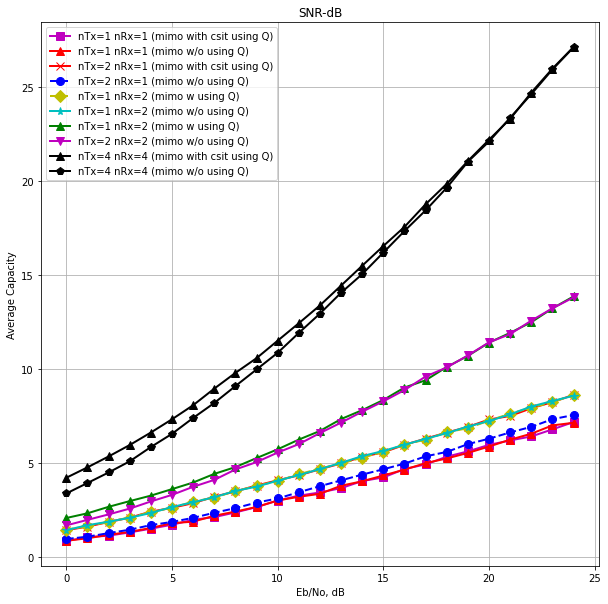

In [17]:
plt.figure()
plt.figure(figsize=(10, 10))

plt.plot(eb_no_db, csit_1tx_1rx, 'ms-', linewidth=2, markersize=8, label='nTx=1 nRx=1 (mimo with csit using Q)')

plt.plot(eb_no_db, capacity_wo_1tx_1rx, 'r^-', linewidth=2, markersize=8, label='nTx=1 nRx=1 (mimo w/o using Q)')

plt.plot(eb_no_db, csit_2tx_1rx, 'rx-', linewidth=2, markersize=8, label='nTx=2 nRx=1 (mimo with csit using Q)')

plt.plot(eb_no_db, capacity_wo_2tx_1rx, 'bo--', linewidth=2, markersize=8, label='nTx=2 nRx=1 (mimo w/o using Q)')

plt.plot(eb_no_db, csit_2rx_1tx, 'yD--', linewidth=2, markersize=8, label='nTx=1 nRx=2 (mimo w using Q)')

plt.plot(eb_no_db, capacity_wo_1tx_2rx, 'c*-', linewidth=2, markersize=8, label='nTx=1 nRx=2 (mimo w/o using Q)')

plt.plot(eb_no_db, csit_2tx_2rx, 'g^-', linewidth=2, markersize=8, label='nTx=1 nRx=2 (mimo w using Q)')

plt.plot(eb_no_db, capacity_wo_2tx_2rx, 'mv-', linewidth=2, markersize=8, label='nTx=2 nRx=2 (mimo w/o using Q)')

plt.plot(eb_no_db, reduced_csit, 'k^-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (mimo with csit using Q)')

plt.plot(eb_no_db, capacity_wo_4tx_4rx, 'kp-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (mimo w/o using Q)')
plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()